In [93]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 

In [94]:
from sys import getsizeof

img = plt.imread("./pics/lena_color_512.tif") # وارد کردن تصویر مورد نظر
print("shape of image:", img.shape) # پیدا کردن ابعاد و عمق تصویر
print("type of elems of image:", img.dtype) # با این دستور به چندی بیتی بودن تصویر دست پیدا میکنیم

gray_img = img[:, :, 0] # استخراج کانال رنگی red به عنوان gray level
print("shape of grayscale image:", gray_img.dtype) # با این دستور به چندی بیتی بودن تصویر خاکستری دست پیدا میکنیم

print("size of image:", getsizeof(img) / 1024 / 1024, "MB")# حجم اشغالی تصویر رنگی در حافظه را به صورت مگابایت به دست می آوریم 
print("size of grayscale image:", getsizeof(gray_img) / 1024 / 1024, "MB")# حجم اشغالی تصویر خاکستری را به صورت مگابایت به دست می آوریم

shape of image: (512, 512, 3)
type of elems of image: uint8
shape of grayscale image: uint8
size of image: 0.0001373291015625 MB
size of grayscale image: 0.0001220703125 MB


In [95]:
half_gray_img = gray_img[:, gray_img.shape[1] // 2:] #  در این کد نیمه عمودی سمت راست تصویر ذخیره میشود

In [96]:
flipped_img = np.flip(half_gray_img, axis=0)# معکوس کردن نیمه تصویر قبلی و ذخیره آن در متغیر جدید

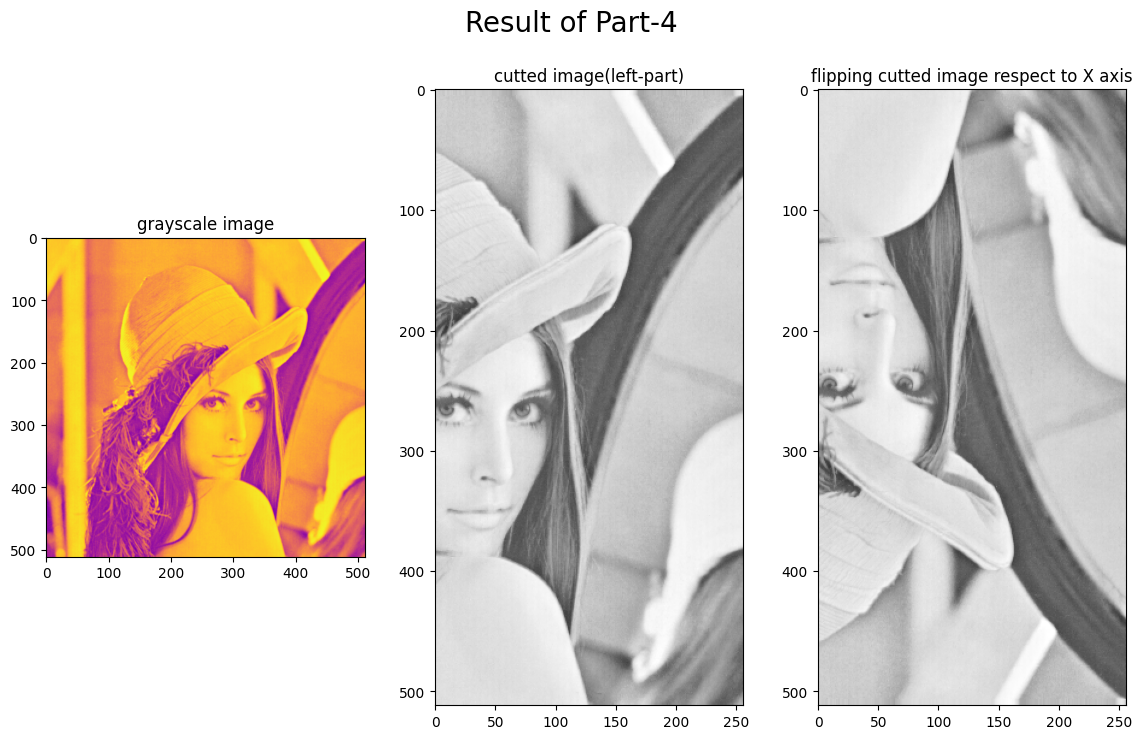

In [97]:
fig , ax = plt.subplots(1, 3, figsize=(14, 8)) # در بدنه تصویر اصلی سه بخش ایجاد میکند 
ax[0].imshow(gray_img, cmap="plasma", vmin=0, vmax=255)# تصویر خاکستری را دریافت کرده و رنگ نمایش آن را به خاکستری تغییر می دهد و محدوده نمایش آن را به صورت 8 بیتی انتخاب میکند 
ax[0].set_title("grayscale image")# عنوان عکس را تعیین میکند
ax[1].imshow(half_gray_img, cmap="gray", vmin=0, vmax=255)# تصویر خاکستری را دریافت کرده و رنگ نمایش آن را به خاکستری تغییر می دهد و محدوده نمایش آن را به صورت 8 بیتی انتخاب میکند 
ax[1].set_title("cutted image(left-part)")# عنوان عکس را تعیین میکند
ax[2].imshow(flipped_img, cmap="gray", vmin=0, vmax=255)# تصویر خاکستری را دریافت کرده و رنگ نمایش آن را به خاکستری تغییر می دهد و محدوده نمایش آن را به صورت 8 بیتی انتخاب میکند 
ax[2].set_title("flipping cutted image respect to X axis")# عنوان عکس را تعیین میکند
fig.suptitle("Result of Part-4", fontsize=20)# عنوان کلی را تعیین می کند
plt.show() # نمایش نهایی نتیجه را انجام میدهد 

Read Dicom images

In [98]:
import pydicom as dicom
import cv2 as cv
from PIL import Image

In [99]:
# read file
dc = dicom.dcmread("./pics/IMG-0001-00001.dcm") # وارد کردن تصویر پزشکی

In [100]:
dc.Modality # مشخص کردن نوع تصویر برداری

'MR'

In [104]:
# answer:
print(dc[("0028", "0100")]) # مشخص کننده چند بیتی بودن تصویر
print(dc[("0028", "0101")]) # مشخض کننده مقدار بیت ذخیره شده 
print(dc[("0018", "0015")]) # مشخص کننده قسمتی از بدن که تصویر برداری شده
print(dc[("0008", "0016")])

(0028,0100) Bits Allocated                      US: 16
(0028,0101) Bits Stored                         US: 12
(0018,0015) Body Part Examined                  CS: 'BRAIN'
(0008,0016) SOP Class UID                       UI: Enhanced MR Image Storage


In [102]:
image = dc.pixel_array # تمامی پیکسل های تصویر را به صورت عددی برمیکرداند
print('maximum value in image is: ', image.max())# بیشترین مقدار پیکسل ها را مشخص میکند
print('minimum value in image is: ', image.min())# کمترین مقدار پیکسل ها را مشخص می کند

maximum value in image is:  1516
minimum value in image is:  0


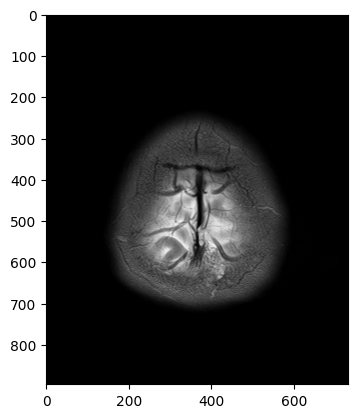

In [107]:
normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image)) # نرمالایز یا استاندارد کردن تصویر را انجام میدهیم
plt.imshow(normalized_image[0], cmap='gray')# اولین فریم از تصویر را انتخاب کرده و آن را به صورت خاکستری در می آورد 
plt.show()# نمایش نتیجه نهایی